In [44]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Loading dataset
dataset = pd.read_csv("/content/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 1500x1500 with 0 Axes>

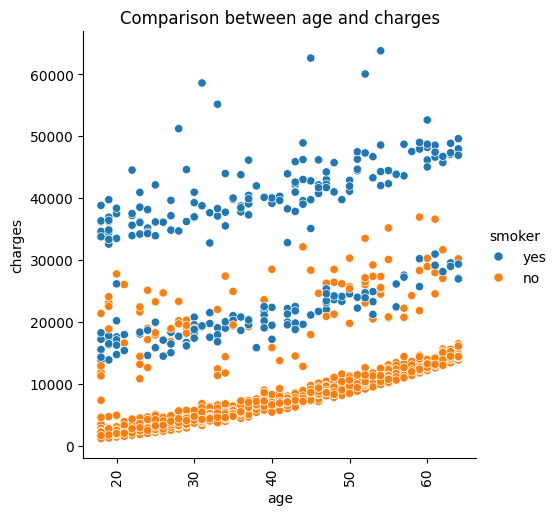

In [48]:
plt.figure(figsize=(15,15))
sns.relplot(x="age",y="charges",hue="smoker",kind="scatter",data=dataset)
plt.title("Comparison between age and charges")
plt.xticks(rotation=90)
plt.show()

**Observation 1**: There is a positive correlation between age and charges although not a huge one.

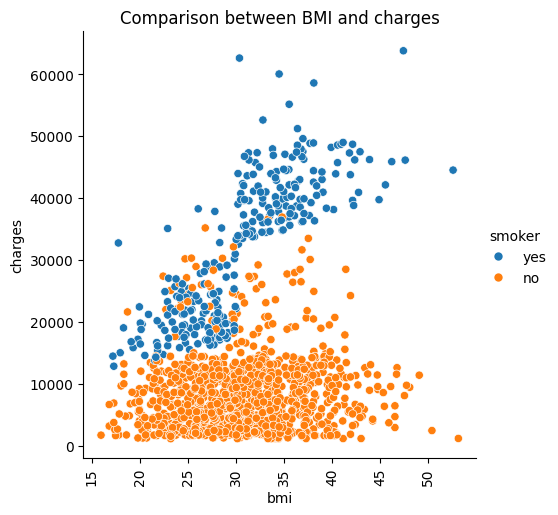

In [49]:
sns.relplot(x="bmi",y="charges",hue="smoker",kind="scatter",data=dataset)
plt.title("Comparison between BMI and charges")
plt.xticks(rotation=90)
plt.show()

**Observation 2**: There is some sort of a correlation, however it is not huge.

In [50]:
dataset.shape

(1338, 7)

In [51]:
#Checking null values
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Observation 3**: There are no missing values in our dataset.

In [52]:
#Checking duplicate values
dataset.drop_duplicates(inplace=True)
dataset.shape

(1337, 7)

**Observation 4**: There was 1 duplicate row which has been removed.  

In [53]:
dataset["smoker"].value_counts()

,count
smoker,
no,1063
yes,274


In [54]:
dataset["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [55]:
dataset["sex"].value_counts()

,count
sex,
male,675
female,662


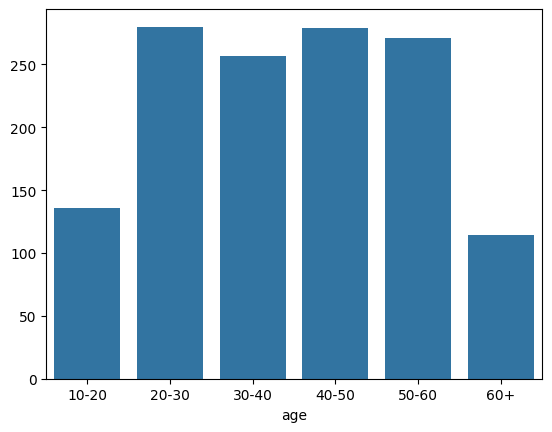

In [56]:
bins = [10,20,30,40,50,60,70]
labels = ["10-20","20-30","30-40","40-50","50-60","60+"]
c = pd.cut(dataset["age"],bins=bins,labels=labels,right=False)
s = c.value_counts(sort=False)
sns.barplot(x=s.index,y=s.values)
plt.show()

In [57]:
#Encoding categorical/string columns
dataset["sex"] = dataset["sex"].map({"male":"1","female":"0"})
dataset["sex"].value_counts()

,count
sex,
1,675
0,662


In [58]:
dataset["sex"] = dataset["sex"].astype(int)
dataset.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [59]:
#Encoding smoker column
dataset["smoker"] = dataset["smoker"].map({"no":"0","yes":"1"})
dataset["smoker"].value_counts()

,count
smoker,
0,1063
1,274


In [60]:
dataset["smoker"]= dataset["smoker"].astype(int)
dataset.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,object
charges,float64


In [61]:
region = dataset["region"]
region.head()

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest


In [62]:
df = dataset.drop(columns="region")

In [63]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [64]:
#Dealing with region category
data = pd.get_dummies(region,drop_first=True).astype(int)
data.tail()

,northwest,southeast,southwest
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1
1337,1,0,0


In [65]:
dataset = pd.concat([df,data],axis=1)
dataset.head(5)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


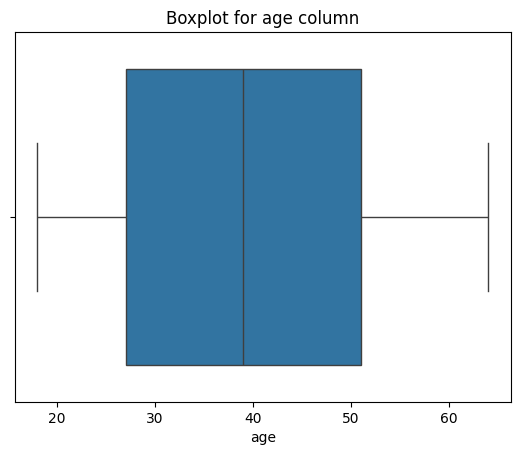

In [66]:
# Removing outliers, if present. The columns to be considered will be age and bmi
sns.boxplot(x="age",data=dataset)
plt.title("Boxplot for age column")
plt.show()

**Observation 5**: There are no outliers present in age column

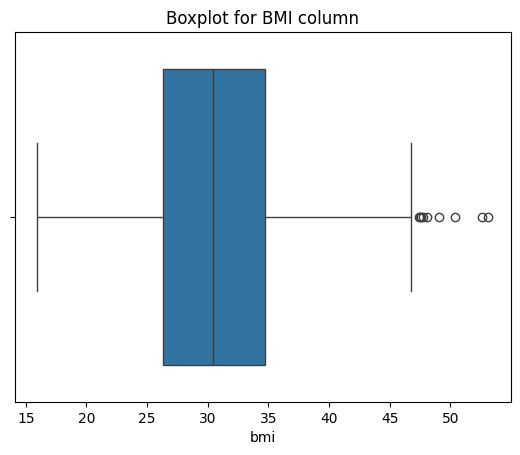

In [67]:
sns.boxplot(x="bmi",data=dataset)
plt.title("Boxplot for BMI column")
plt.show()

**Observation 6**: There are outliers present in BMI column which will have to be removed.

In [68]:
q1= dataset["bmi"].quantile(0.25)
q3 = dataset["bmi"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
dataset = dataset[(dataset["bmi"]>=min_value) & (dataset["bmi"]<=max_value)]
dataset.shape

(1328, 9)

**Observation 7:** 9 rows have been removed while removing outliers in BMI column

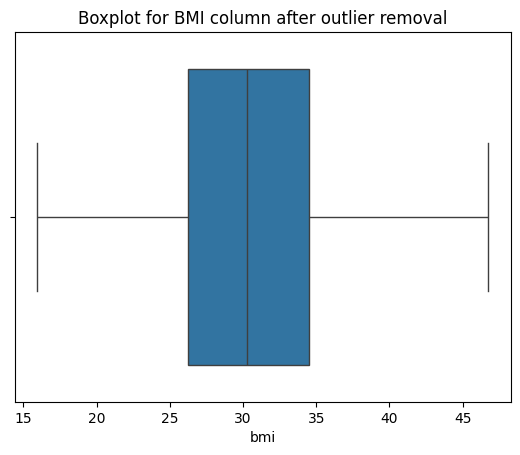

In [69]:
sns.boxplot(x="bmi",data=dataset)
plt.title("Boxplot for BMI column after outlier removal")
plt.show()

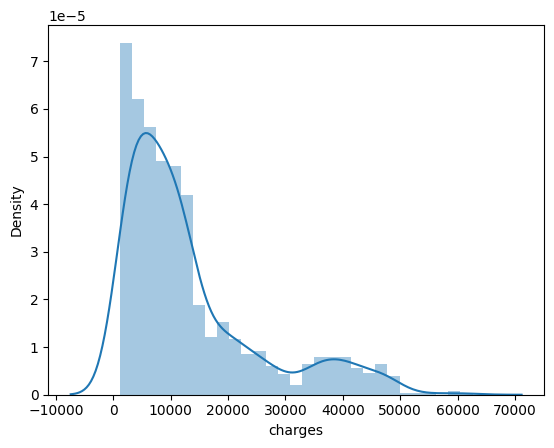

In [70]:
sns.distplot(dataset["charges"],kde=True)
plt.show()

In [71]:
dataset["log_charges"] = np.log2(dataset["charges"])
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
charges,0
northwest,0
southeast,0
southwest,0
log_charges,0


In [72]:
dataset = dataset.drop(columns=["charges"])
dataset.shape

(1328, 9)

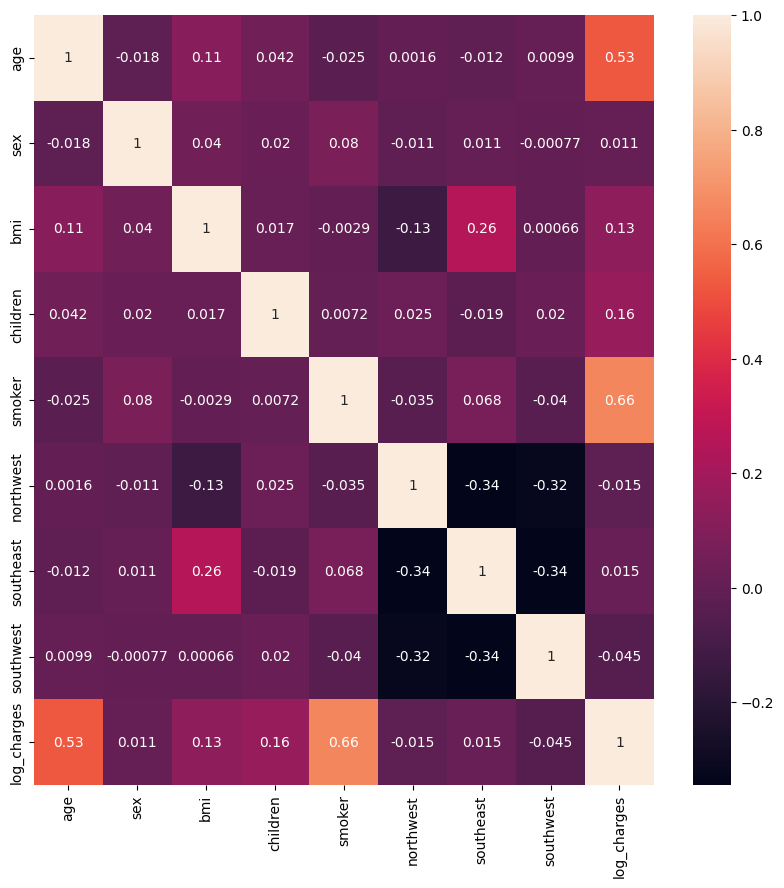

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [74]:
# Feature Engineering
dataset = dataset.drop(columns=["sex"])

In [75]:
# Removing no columns in first try
y = dataset[["log_charges"]]
x = dataset.drop(columns="log_charges")

In [76]:
x.head()

,age,bmi,children,smoker,northwest,southeast,southwest
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,0,1,0
2,28,33.000,3,0,0,1,0
3,33,22.705,0,0,1,0,0
4,32,28.880,0,0,1,0,0


In [78]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [79]:
x.shape

(1328, 7)

In [80]:
y = pd.DataFrame(ss.fit_transform(y),columns=y.columns)
y.shape

(1328, 1)

In [81]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
kf = KFold(n_splits=4,shuffle=True,random_state=42)
lr = LinearRegression()
cv_score = cross_val_score(lr,x,y,cv=kf)
print(cv_score)
print(np.mean(cv_score))

[0.75828406 0.77710613 0.77422991 0.74025828]
0.762469597241071


**Observation 8**: The R squared values are decent enough. A value of 0.74 suggests that the model is capturing variance effectively.

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
rfr = RandomForestRegressor(max_depth=4)
rfr.fit(x_train,y_train)
y_predict = rfr.predict(x_test)
r2 = r2_score(y_predict,y_test)
mse = mean_squared_error(y_predict,y_test)
print("The R-squared value from Random Forest is: ",r2)
print("The mean squared error comes out to be: ",mse)

The R-squared value from Random Forest is:  0.7601893731825835
The mean squared error comes out to be:  0.18710919832969727


In [85]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(x_train,y_train)
y_predict = dt.predict(x_test)
r2 = r2_score(y_predict,y_test)
mse = mean_squared_error(y_predict,y_test)
print("The R-squared value from Decision Tree Regressor is: ",r2)
print("The mean squared error comes out to be: ",mse)

The R-squared value from Decision Tree Regressor is:  0.7381127515008163
The mean squared error comes out to be:  0.2089129323938371


In [86]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_predict = svr.predict(x_test)
r2 = r2_score(y_predict,y_test)
print("The R-squared value from Support Vector Regressor is: ",r2)

The R-squared value from Support Vector Regressor is:  0.7672275929676653


In [87]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
y_predict = svr.predict(x_test)
r2 = r2_score(y_predict,y_test)
print("The R-squared value from KNN Regressor is: ",r2)

The R-squared value from KNN Regressor is:  0.7672275929676653
